In [1]:
### 第 13 題
import numpy as np
###(a)隨機種子
np.random.seed(1)
x = np.random.normal(0, 1, 100)

In [3]:
###(b)eps
eps = np.random.normal(0, np.sqrt(0.25), 100)

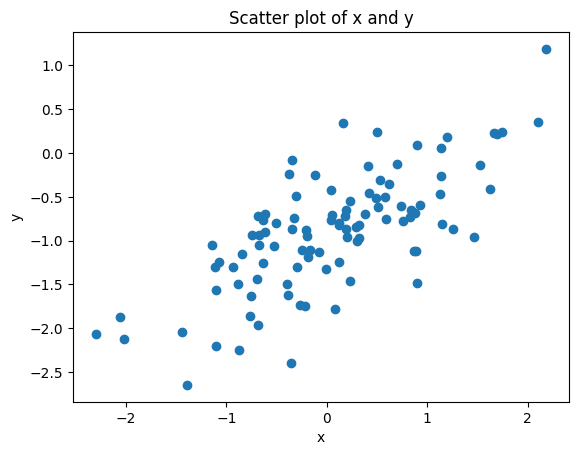

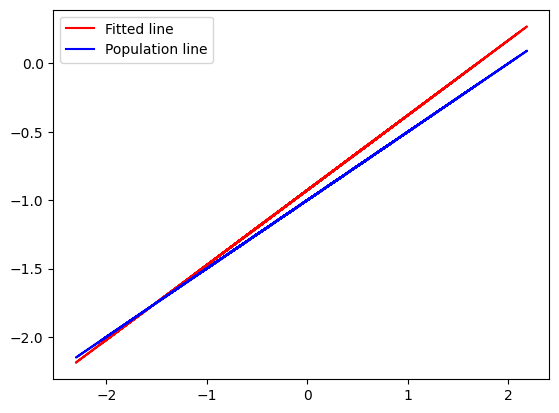

In [15]:
###(c)Y =−1+0.5X+ε

np.random.seed(1)
x = np.random.normal(0, 1, 100)

y = -1 + 0.5 * x + eps

len_y = len(y)

###(d) 散步圖
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()

###(e) 最小二乘法線性模型
from sklearn.linear_model import LinearRegression

###建立模型
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

### βˆ0 and βˆ1
beta_0_hat = model.intercept_
beat_1_hat = model.coef_[0]

###(f) plt.scatte(x, y, label='Data points')
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', label='Fitted line')

plt.plot(x, -1 + 0.5 * x, color='blue', label='Population line')

plt.legend()
plt.show()


In [17]:
###(g) 多項式回歸模型
x_squared = x**2

X_poly = np.column_stack((x, x_squared))

# 多項式回歸模型
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# 提取係數和截距
beta_0_poly = poly_model.intercept_
beta_1_poly, beta_2_poly = poly_model.coef_

# result
print(f"β0: {beta_0_poly}, β1: {beta_1_poly}, β2: {beta_2_poly}")

###(h) 透過eps減少模型的噪聲
# 減少噪聲（將誤差項 eps 的方差從 0.25 減少到 0.1
eps_less_noise = np.random.normal(0, np.sqrt(0.1), 100)

# 生成新的 y 向量
y_less_noise = -1 + 0.5 * x + eps_less_noise

###(i) 增加噪聲
### eps 的方差從 0.25 增加到 0.5
eps_more_noise = np.random.normal(0, np.sqrt(0.5), 100)

# 生成新的 y 向量
y_more_noise = -1 + 0.5 * x + eps_more_noise


###三個一起比較
import statsmodels.api as sm

# 使用 statsmodels 來計算置信區間
X = sm.add_constant(x)
ols_model = sm.OLS(y, X).fit()
conf_interval_original = ols_model.conf_int()

# 對噪聲較小的數據
ols_model_less_noise = sm.OLS(y_less_noise, X).fit()
conf_interval_less_noise = ols_model_less_noise.conf_int()

# 對噪聲較大的數據
ols_model_more_noise = sm.OLS(y_more_noise, X).fit()
conf_interval_more_noise = ols_model_more_noise.conf_int()

# 打印置信區間
print("原始數據集的置信區間：\n", conf_interval_original)
print("噪聲較小數據集的置信區間：\n", conf_interval_less_noise)
print("噪聲較大數據集的置信區間：\n", conf_interval_more_noise)


β0: -0.9325086014205128, β1: 0.5468098121072971, β2: 0.007711300469125802
原始數據集的置信區間：
 [[-1.01974096 -0.83324551]
 [ 0.44261338  0.65281376]]
噪聲較小數據集的置信區間：
 [[-1.01248528 -0.8945352 ]
 [ 0.46370551  0.59664791]]
噪聲較大數據集的置信區間：
 [[-1.13398324 -0.84860871]
 [ 0.31014327  0.63179097]]
